In [28]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
file_path1 = './CSV/DependentsCounts.csv'
file_path2 = './CSV/DependenciesCountperArtifact.csv'
df_dependents = pd.read_csv(file_path1)
df_dependencies = pd.read_csv(file_path2)

In [19]:
df_dependents

,Artifact,DependentReleases,DependentArtifacts
0,junit:junit,2775545,152993
1,org.slf4j:slf4j-api,1965315,86288
2,org.mockito:mockito-core,1716125,49097
3,org.scala-lang:scala-library,1578767,81074
4,org.assertj:assertj-core,1098573,26342
...,...,...,...
312791,org.webjars.npm:big-sparse-array,1,1
312792,org.webjars.npm:quickbit-universal,1,1
312793,org.webjars.npm:random-array-iterator,1,1
312794,org.webjars.npm:crc-universal,1,1


In [20]:
df_dependencies

,Artifact,DependenciesCount
0,com.ibm.websphere.appserver.features:zosBundle,1337
1,org.apache.camel:apache-camel,1323
2,com.ibm.websphere.appserver.features:ndMemberB...,1289
3,com.ibm.websphere.appserver.features:baseBundle,1286
4,com.ibm.websphere.appserver.features:libertyCo...,1021
...,...,...
551723,com.atlassian.prosemirror:util,1
551724,org.apache.camel.karaf:camel-asn1,1
551725,org.danilopianini:template-for-kotlin-multipla...,1
551726,org.eclipse.platform:org.eclipse.equinox.launc...,1


In [21]:
df_score = pd.merge(df_dependents,df_dependencies, on = 'Artifact', how = 'outer')
df_score.fillna(0, inplace=True)

In [22]:
df_score

,Artifact,DependentReleases,DependentArtifacts,DependenciesCount
0,junit:junit,2775545.0,152993.0,2.0
1,org.slf4j:slf4j-api,1965315.0,86288.0,2.0
2,org.mockito:mockito-core,1716125.0,49097.0,7.0
3,org.scala-lang:scala-library,1578767.0,81074.0,1.0
4,org.assertj:assertj-core,1098573.0,26342.0,39.0
...,...,...,...,...
592560,ru.pocketbyte.locolaser:runtime-androidnativea...,0.0,0.0,1.0
592561,co.touchlab.skie:runtime-kotlin-1.9.0-watchosa...,0.0,0.0,1.0
592562,org.apache.camel.karaf:camel-asn1,0.0,0.0,1.0
592563,org.danilopianini:template-for-kotlin-multipla...,0.0,0.0,1.0


In [23]:
df_score['stabilityScore'] = df_score['DependenciesCount']/(df_score['DependenciesCount']+df_score['DependentArtifacts'])

In [24]:
df_score

,Artifact,DependentReleases,DependentArtifacts,DependenciesCount,stabilityScore
0,junit:junit,2775545.0,152993.0,2.0,0.000013
1,org.slf4j:slf4j-api,1965315.0,86288.0,2.0,0.000023
2,org.mockito:mockito-core,1716125.0,49097.0,7.0,0.000143
3,org.scala-lang:scala-library,1578767.0,81074.0,1.0,0.000012
4,org.assertj:assertj-core,1098573.0,26342.0,39.0,0.001478
...,...,...,...,...,...
592560,ru.pocketbyte.locolaser:runtime-androidnativea...,0.0,0.0,1.0,1.000000
592561,co.touchlab.skie:runtime-kotlin-1.9.0-watchosa...,0.0,0.0,1.0,1.000000
592562,org.apache.camel.karaf:camel-asn1,0.0,0.0,1.0,1.000000
592563,org.danilopianini:template-for-kotlin-multipla...,0.0,0.0,1.0,1.000000


In [16]:
excel_file_path = './CSV/stabilityScore.xlsx'
df_score.to_excel(excel_file_path, index=False)

In [27]:
print(Counter(df_score['stabilityScore']))

Counter({1.0: 279769, 0.0: 40837, 0.5: 21894, 0.6666666666666666: 20686, 0.75: 17743, 0.8: 14546, 0.8333333333333334: 12547, 0.8571428571428571: 10540, 0.875: 8053, 0.6: 7756, 0.3333333333333333: 7431, 0.8888888888888888: 6410, 0.9: 5466, 0.7142857142857143: 5332, 0.9090909090909091: 4971, 0.7777777777777778: 3889, 0.4: 3861, 0.9166666666666666: 3854, 0.25: 3533, 0.5714285714285714: 3276, 0.9230769230769231: 3271, 0.625: 2729, 0.8181818181818182: 2701, 0.9285714285714286: 2547, 0.42857142857142855: 2248, 0.9333333333333333: 2178, 0.2: 2165, 0.7: 2033, 0.8461538461538461: 1886, 0.7272727272727273: 1842, 0.9375: 1800, 0.5555555555555556: 1733, 0.9411764705882353: 1496, 0.8666666666666667: 1465, 0.375: 1407, 0.2857142857142857: 1395, 0.7692307692307693: 1383, 0.6363636363636364: 1321, 0.4444444444444444: 1236, 0.16666666666666666: 1181, 0.7857142857142857: 1150, 0.9444444444444444: 1147, 0.9473684210526315: 1079, 0.8823529411764706: 1028, 0.95: 968, 0.5454545454545454: 943, 0.954545454545

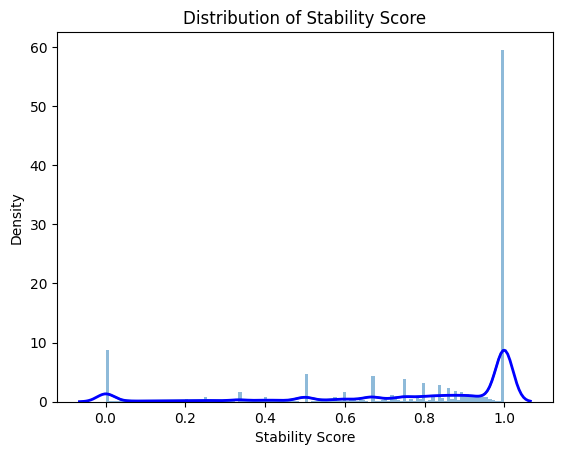

C:\Users\divya\AppData\Local\Temp\ipykernel_19624\257712347.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


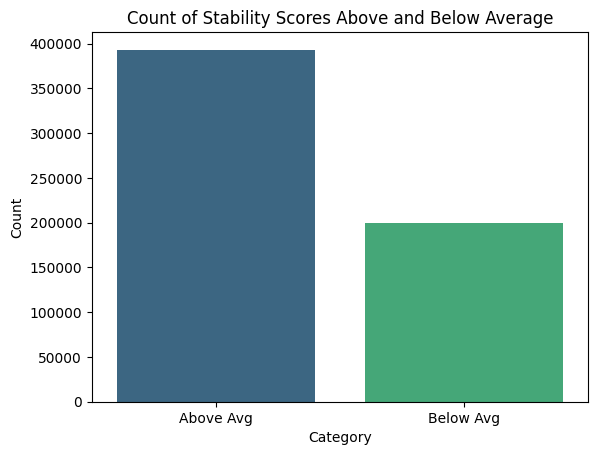

In [36]:
sns.histplot(df_score['stabilityScore'], kde=True, stat = 'density',linewidth=0)
sns.kdeplot(df_score['stabilityScore'], color='blue', linewidth=2)

# Customizing the plot
plt.title('Distribution of Stability Score')
plt.xlabel('Stability Score')
plt.ylabel('Density')
plt.show()

# Explanation of KDE curve:
# A KDE (Kernel Density Estimate) curve is a smooth, continuous line that represents the probability density function 
# of a dataset. It helps to visualize the distribution of data points and is useful for understanding the underlying 
# trends or patterns. In this plot, the KDE curve shows how the stability scores are distributed across different values.

# Calculating the average stability score
avg_stability = df_score['stabilityScore'].mean()

# Creating a new column to categorize scores as 'Above Average' or 'Below Average'
df_score['Above_Avg'] = df_score['stabilityScore'] > avg_stability

# Counting values above and below the average
counts = df_score['Above_Avg'].value_counts().rename(index={True: 'Above Avg', False: 'Below Avg'})

# Plotting the counts
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Customizing the plot
plt.title('Count of Stability Scores Above and Below Average')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [31]:
avg_stability

0.7760740176906225